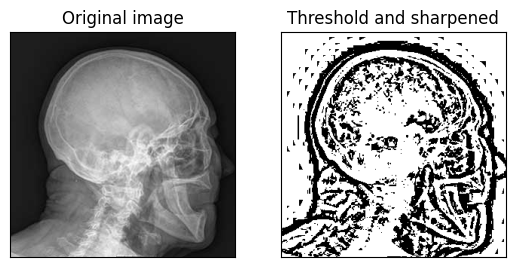

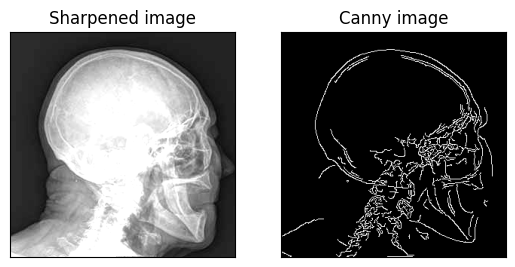

In [23]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# Carrega a imagem em escala de cinza
img = cv2.imread('cranio.jpg', cv2.IMREAD_GRAYSCALE)

# Aplica blur e sharpened na imagem
blur = cv2.GaussianBlur(img, (3, 3), 0)

edges = cv2.subtract(img, blur)
sharpened = cv2.addWeighted(img, 1.5, edges, 0.5, 0)

# Calcula o histograma da imagem
hist = cv2.calcHist([img], channels=[0], mask=None, histSize=[256], ranges=[0, 256])

# Divide o histograma em duas partes
half_hist = int(len(hist) / 2)
hist1 = hist[:half_hist]
hist2 = hist[half_hist:]

# Encontra os picos em cada parte do histograma
idx_peak1 = np.argmax(hist1)
idx_peak2 = np.argmax(hist2) + half_hist

# Aplica a média entre os picos encontrados
mean_peak = int((idx_peak1 + idx_peak2) / 2)

# Apply thresholding
#ret, thresh_img_sharpened = cv2.adthreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY)
thresh_img_sharpened = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 17, 2)

# Aplica threshold para binarizacao da imagem 
ret, thresh_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

# Aplica detector de bordas canny na imagem equalizada
cannySp = cv2.Canny(sharpened, 100, 200)
canny = cv2.Canny(img, 100, 200)

# Mostra as imagens original e com threshold
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(thresh_img_sharpened, cmap='gray')
plt.title('Threshold and sharpened'), plt.xticks([]), plt.yticks([])
plt.show()

# Mostra as imagens Sharpened e Canny
plt.subplot(121), plt.imshow(sharpened, cmap='gray')
plt.title('Sharpened image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(canny, cmap='gray')
plt.title('Canny image'), plt.xticks([]), plt.yticks([])
plt.show()

